In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
import yaml
import os

# Load configuration
with open('../../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

In [4]:
# Load the dataset and the shapefile
aei_gdf = gpd.read_file(resolve_path(config['AEI_2015_reproj_gpkg_path']))
africa_shp = gpd.read_file(resolve_path(config['Africa_all_shp_path']))

# Check if the CRS are the same
if aei_gdf.crs != africa_shp.crs:
    print(africa_shp.crs)
    africa_shp = africa_shp.to_crs(aei_gdf.crs)
    print(africa_shp.crs)

# Perform the crop (clip the dataset to the Africa shapefile boundaries)
cropped_gdf = gpd.clip(aei_gdf, africa_shp)

# Save the result to a new file
cropped_gdf.to_file(resolve_path(config['Arid_AEI_2015_gpkg_path']))

EPSG:4326
EPSG:3857


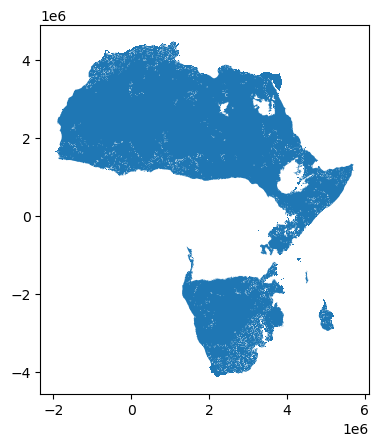

In [7]:
cropped_gdf.plot()
plt.show()